## **Assignment 2 - Generative vs. Discriminative Models**

In [ ]:
pip install seaborn scikit-learn matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries
This cell imports the required libraries for data handling, visualization, and machine learning:
- **pandas**: For data manipulation and analysis.
- **seaborn**: For dataset loading and visualization.
- **sklearn**: For splitting the dataset, building models, and evaluating performance metrics.
- **numpy**: For numerical computations.
- **matplotlib.pyplot**: For plotting charts and graphs.
- **warnings**: To suppress unnecessary warnings during execution.

These libraries collectively provide the tools needed for data analysis, model training, and evaluation.


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Loading the Dataset
The penguins dataset is loaded using `seaborn`'s `load_dataset` function.

The dataset size (total number of elements) and shape (number of rows and columns) are printed to get an overview of the data.

- The dataset consists of **344 rows** and **7 columns**, making it small and manageable for analysis.
- The size of **2408 elements** indicates the total number of data points available.


In [ ]:
# Load the penguins dataset
all_data = sns.load_dataset('penguins')

# Print dataset size and shape
print("Dataset Size:", all_data.size)
print("Dataset Shape:", all_data.shape)

Dataset Size: 2408
Dataset Shape: (344, 7)


# Checking Unique Species
The unique species in the `species` column are identified using the `unique()` function.

- The dataset contains three distinct species: **Adelie**, **Chinstrap**, and **Gentoo**.
- This confirms the dataset is initially designed for a multi-class classification problem.
- These species represent the target variable for subsequent modeling tasks.


In [ ]:
species_distinct = all_data['species'].unique()
print("Unique Species:", species_distinct)

Unique Species: ['Adelie' 'Chinstrap' 'Gentoo']


# Filtering Specific Data
The dataset is filtered to include only the **Adelie** and **Gentoo** species.

- This reduces the classification problem to a binary task, simplifying analysis and modeling.
- Rows corresponding to the **Chinstrap** species are removed from the dataset.

After filtering, the dataset now consists of **276 rows** and **7 columns**.


In [ ]:
req_data = all_data[all_data['species'].isin(['Adelie', 'Gentoo'])]

# Print filtered data size and shape
print("Filtered Dataset Size:", req_data.size)
print("Filtered Dataset Shape:", req_data.shape)

Filtered Dataset Size: 1932
Filtered Dataset Shape: (276, 7)


# Removing Missing Values
Rows with missing values are removed from the dataset using the `dropna()` method.

- This ensures data integrity and prevents potential issues during model training and evaluation.
- Only rows with complete data across all columns are retained for analysis.

The dataset now contains only complete observations, ready for further preprocessing.


In [ ]:
req_data = req_data.dropna()
print("Dataset after dropping missing values:", req_data.shape)

Dataset after dropping missing values: (265, 7)


# Encoding Categorical Variables
Categorical columns (`sex` and `island`) are converted into numerical format using one-hot encoding.

- This process creates new binary columns for each category in the `sex` and `island` columns.
- The `drop_first=True` parameter is used to avoid multicollinearity by excluding one category per feature.

The dataset now includes additional columns for categorical variables, enabling compatibility with machine learning models.


In [ ]:
req_data = pd.get_dummies(req_data, columns=['sex', 'island'], drop_first=True)

# Print updated column names
print("Dataset Columns After Encoding:", req_data.columns)

Dataset Columns After Encoding: Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_Male', 'island_Dream', 'island_Torgersen'],
      dtype='object')


# Splitting Data into Features and Labels
Features (`X`) and labels (`y`) are separated:

- Features: Includes columns such as `island_Dream`, `island_Torgersen`, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`, and `sex_Male`.
- Labels: The `species` column is mapped to binary values, where **Adelie = 0** and **Gentoo = 1**.

This step ensures that the predictors (`X`) and target variable (`y`) are ready for model training.


In [ ]:
X = req_data[['island_Dream', 'island_Torgersen', 'bill_length_mm',
              'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_Male']]
y = req_data['species'].map({'Adelie': 0, 'Gentoo': 1})

# Ensure no missing values in X and adjust y accordingly
X.dropna(inplace=True)
y = y[X.index]

# Print feature and label shapes
print("Features Shape:", X.shape)
print("Labels Shape:", y.shape)

Features Shape: (265, 7)
Labels Shape: (265,)


# Splitting Data into Training and Testing Sets
The dataset is divided into training and testing sets using an 80-20 split with `train_test_split`.

- **Training set**: Contains 80% of the data for model training.
- **Testing set**: Contains 20% of the data for evaluating model performance.
- `random_state=42` ensures reproducibility of the split.

This step ensures that the model is trained on one part of the data and tested on unseen data for fair evaluation.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the training and testing sets
print("Training Set Features Shape:", X_train.shape)
print("Test Set Features Shape:", X_test.shape)
print("Training Set Labels Shape:", y_train.shape)
print("Test Set Labels Shape:", y_test.shape)

Training Set Features Shape: (212, 7)
Test Set Features Shape: (53, 7)
Training Set Labels Shape: (212,)
Test Set Labels Shape: (53,)


# Training Naive Bayes Model
The Naive Bayes model is trained using the training dataset (`X_train` and `y_train`).

- Predictions are made on the test dataset (`X_test`) using the `predict` method.
- The model's accuracy is calculated using `accuracy_score`, comparing the predicted labels (`y_pred_nb`) with the true labels (`y_test`).

The Naive Bayes model achieves an accuracy of **1.000**, indicating perfect classification on the test dataset.


In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb.predict(X_test)

# Calculate accuracy for the Naive Bayes model
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")

Naive Bayes Accuracy: 1.0000


# Training Logistic Regression Model
The Logistic Regression model is trained with a maximum of 1000 iterations using the training dataset (`X_train` and `y_train`).

- Predictions are made on the test dataset (`X_test`) using the `predict` method.
- The model's accuracy is calculated using `accuracy_score`, comparing the predicted labels (`y_pred_lr`) with the true labels (`y_test`).

The Logistic Regression model also achieves an accuracy of **1.000**, indicating perfect classification on the test dataset.


In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Calculate accuracy for the Logistic Regression model
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")

Logistic Regression Accuracy: 1.0000


# Accuracy Comparison
The accuracies of the Naive Bayes and Logistic Regression models are compared:

- **Naive Bayes Accuracy:** 1.000
- **Logistic Regression Accuracy:** 1.000

Both models show identical performance with perfect accuracy on the test dataset.


In [ ]:
print("Accuracy Comparison:")
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")

Accuracy Comparison:
Naive Bayes Accuracy: 1.0000
Logistic Regression Accuracy: 1.0000


# Confusion Matrix and Classification Report: Naive Bayes
The confusion matrix and classification report are generated for the Naive Bayes model:

- **Confusion Matrix**:
  - [[33, 0], [0, 20]] indicates that all samples are correctly classified.
  - There are no false positives or false negatives.

- **Classification Report**:
  - Precision, recall, and F1-score for both classes are 1.00.
  - Overall accuracy is 1.00, confirming perfect classification for both classes (Class 0 and Class 1).


In [ ]:
# Confusion Matrices
cf_nb = confusion_matrix(y_test, y_pred_nb)
cf_lr = confusion_matrix(y_test, y_pred_lr)

print("\nConfusion Matrix (Naive Bayes):")
print(cf_nb)
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb, target_names=["Class 0", "Class 1"]))


Confusion Matrix (Naive Bayes):
[[33  0]
 [ 0 20]]

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        33
     Class 1       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



# Confusion Matrix and Classification Report: Logistic Regression
The confusion matrix and classification report are generated for the Logistic Regression model:

- **Confusion Matrix**:
  - [[33, 0], [0, 20]] shows that all samples are correctly classified.
  - No misclassifications are observed.

- **Classification Report**:
  - Precision, recall, and F1-score for both classes are 1.00.
  - Overall accuracy is 1.00, indicating perfect performance for the Logistic Regression model.


In [ ]:
print("\nConfusion Matrix (Logistic Regression):")
print(cf_lr)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, target_names=["Class 0", "Class 1"]))


Confusion Matrix (Logistic Regression):
[[33  0]
 [ 0 20]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        33
     Class 1       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



# AUC Calculation for Both Models
The Area Under the Curve (AUC) is calculated for both models using probabilities on the test dataset:

- **Naive Bayes**:
  - AUC = 1.00, confirming the model's ability to perfectly distinguish between the two classes.
  
- **Logistic Regression**:
  - AUC = 1.00, also indicating perfect discrimination between classes.

Both models achieve an AUC of 1.00, signifying identical performance in this metric.


In [ ]:
# Calculate AUC for both models
nb_test_proba = nb_model.predict_proba(X_test)[:, 1]
lr_test_proba = lr_model.predict_proba(X_test)[:, 1]
nb_auc = roc_auc_score(y_test, nb_test_proba)
lr_auc = roc_auc_score(y_test, lr_test_proba)

print("AUC:")
print(f"Naive Bayes: {nb_auc}")
print(f"Logistic Regression: {lr_auc}")b

AUC:
Naive Bayes: 1.0
Logistic Regression: 1.0


In [ ]:
nb_test_probs = nb.predict_proba(X_test)[:, 1]
lr_test_probs = lr.predict_proba(X_test)[:, 1]
nb_train_probs = nb.predict_proba(X_train)[:, 1]
lr_train_probs = lr.predict_proba(X_train)[:, 1]

# Calculate AUC scores
nb_train_auc = roc_auc_score(y_train, nb_train_probs)
nb_test_auc = roc_auc_score(y_test, nb_test_probs)
lr_train_auc = roc_auc_score(y_train, lr_train_probs)
lr_test_auc = roc_auc_score(y_test, lr_test_probs)

# AUC for Training and Test Sets
AUC scores are calculated separately for the training and test sets:

- **Naive Bayes**:
  - Train AUC = 1.00
  - Test AUC = 1.00
  
- **Logistic Regression**:
  - Train AUC = 1.00
  - Test AUC = 1.00

Both models demonstrate perfect discrimination in both training and test sets, with no signs of overfitting.


In [ ]:
# Print AUC results
print("AUC Scores:")
print(f"Naive Bayes - Train: {nb_train_auc:.2f}, Test: {nb_test_auc:.2f}")
print(f"Logistic Regression - Train: {lr_train_auc:.2f}, Test: {lr_test_auc:.2f}")

AUC Scores:
Naive Bayes - Train: 1.00, Test: 1.00
Logistic Regression - Train: 1.00, Test: 1.00


# ROC Curves for Naive Bayes and Logistic Regression
Side-by-side ROC curves are plotted for Naive Bayes and Logistic Regression models:

- **Naive Bayes ROC Curve**:
  - Displays a curve with an Area Under the Curve (AUC) of **1.00**, indicating perfect classification performance.
  - The curve is far from the diagonal line, confirming its ability to distinguish between classes.

- **Logistic Regression ROC Curve**:
  - Shows a similar curve with an AUC of **1.00**, also confirming perfect classification performance.
  - Both models have identical performance, as indicated by their curves.


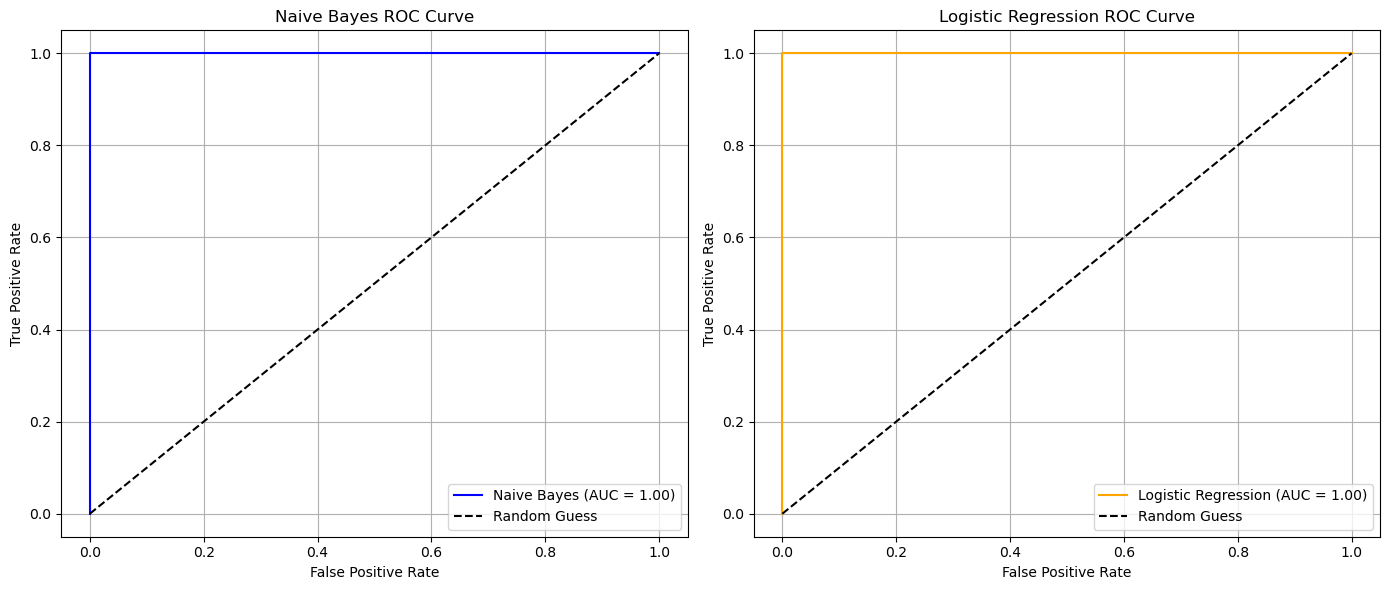

In [ ]:
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_test_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_test_probs)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Naive Bayes ROC Curve
ax[0].plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_test_auc:.2f})", color='blue')
ax[0].plot([0, 1], [0, 1], 'k--', label="Random Guess")
ax[0].set_title("Naive Bayes ROC Curve")
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].legend()
ax[0].grid()

# Logistic Regression ROC Curve
ax[1].plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_test_auc:.2f})", color='orange')
ax[1].plot([0, 1], [0, 1], 'k--', label="Random Guess")
ax[1].set_title("Logistic Regression ROC Curve")
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()

# Computing Lift and Gain
Lift and Gain values are computed for both Naive Bayes and Logistic Regression models using decile analysis:

- **Lift**: Indicates how much better the model performs compared to random guessing. Higher lift values in early deciles suggest strong model performance.
- **Gain**: Represents the cumulative percentage of true positives captured by each decile.

These metrics provide deeper insights into the ranking and prioritization capabilities of each model.


In [ ]:
def compute_lift_gain(y_true, y_prob, num_deciles=10):
    df = pd.DataFrame({'Actual': y_true, 'Probability': y_prob})
    df = df.sort_values('Probability', ascending=False)
    df['Decile'] = pd.qcut(df['Probability'], num_deciles, labels=range(num_deciles, 0, -1), duplicates='drop')
    gain, lift, positives, count, cumulative_positives, cumulative_percentage = [], [], [], [], [], []
    grouped = df.groupby('Decile')
    total_positives = df['Actual'].sum()
    for i in range(1, df['Decile'].nunique() + 1):
        grouped_df = grouped.get_group(i)
        positives_in_decile = grouped_df['Actual'].sum()
        positives.append(positives_in_decile)
        count.append(len(grouped_df))
        cumulative_positives.append(sum(positives[:i]))
        cumulative_percentage.append(cumulative_positives[i-1] / total_positives * 100)
        gain.append(cumulative_positives[i-1] / total_positives)
        lift.append(cumulative_percentage[i-1] / (i / num_deciles * 100))
    return pd.DataFrame({'Decile': range(1, num_deciles + 1),
                         'Positives': positives,
                         'Count': count,
                         'Cumulative Positives': cumulative_positives,
                         'Cumulative Percentage': cumulative_percentage,
                         'Lift': lift,
                         'Gain': gain})

# Predict probabilities for Naive Bayes and Logistic Regression
y_prob_nb_test = nb.predict_proba(X_test)[:, 1]
y_prob_lr_test = lr.predict_proba(X_test)[:, 1]

# Lift and Gain for Naive Bayes
The Naive Bayes model's Lift and Gain charts are plotted:

- **Lift**: Starts high in early deciles (up to 3.00) and gradually decreases to 1.00 by the last decile, indicating diminishing returns in later deciles.
- **Gain**: Increases steadily, reaching 100% in the final decile, showing that all positives are captured cumulatively.

This highlights the model's ability to prioritize true positives in the earlier deciles.


# Lift and Gain for Logistic Regression
The Logistic Regression model's Lift and Gain charts are plotted:

- **Lift**: Similar to Naive Bayes, it starts at 3.00 in the first decile and gradually decreases to 1.00 in the last decile, demonstrating consistent performance.
- **Gain**: Progressively increases to 100% in the final decile, confirming effective prioritization of true positives.

Both models show nearly identical trends, suggesting equivalent performance in terms of lift and gain.


# **Lift and Gain Analysis for Naive Bayes and Logistic Regression**

The plotted charts showcase the Lift and Gain analysis for both models (Naive Bayes and Logistic Regression) over 10 deciles. Here's the interpretation:

---

## **Naive Bayes: Lift and Gain**
- **Lift:**
  - Starts at a high value of **3.00** in the first decile, indicating strong prioritization of true positives at the top.
  - Gradually decreases as more data is included, reaching **1.00** in the last decile, representing random classification.
- **Gain:**
  - Increases steadily, with 80% of true positives captured within the first three deciles.
  - Reaches **100%** by the 10th decile, confirming that all true positives are identified cumulatively.

---

## **Logistic Regression: Lift and Gain**
- **Lift:**
  - Begins with a similar value of **3.00** in the first decile, demonstrating comparable prioritization capabilities to Naive Bayes.
  - Also declines as more deciles are included, reaching **1.00** by the last decile.
- **Gain:**
  - Progresses consistently, capturing 80% of true positives by the third decile.
  - Like Naive Bayes, achieves **100%** by the 10th decile.

---

## **Comparison**
Both models exhibit almost identical Lift and Gain patterns, reflecting similar ranking and classification effectiveness. This demonstrates that either model could be used for this dataset with comparable results.


Lift and Gain for Naive Bayes:
    Decile  Positives  Count  Cumulative Positives  Cumulative Percentage  \
0       1          6      6                     6                   30.0   
1       2          5      5                    11                   55.0   
2       3          5      5                    16                   80.0   
3       4          4      5                    20                  100.0   
4       5          0      5                    20                  100.0   
5       6          0      6                    20                  100.0   
6       7          0      5                    20                  100.0   
7       8          0      5                    20                  100.0   
8       9          0      5                    20                  100.0   
9      10          0      6                    20                  100.0   

       Lift  Gain  
0  3.000000  0.30  
1  2.750000  0.55  
2  2.666667  0.80  
3  2.500000  1.00  
4  2.000000  1.00  
5  1.666667

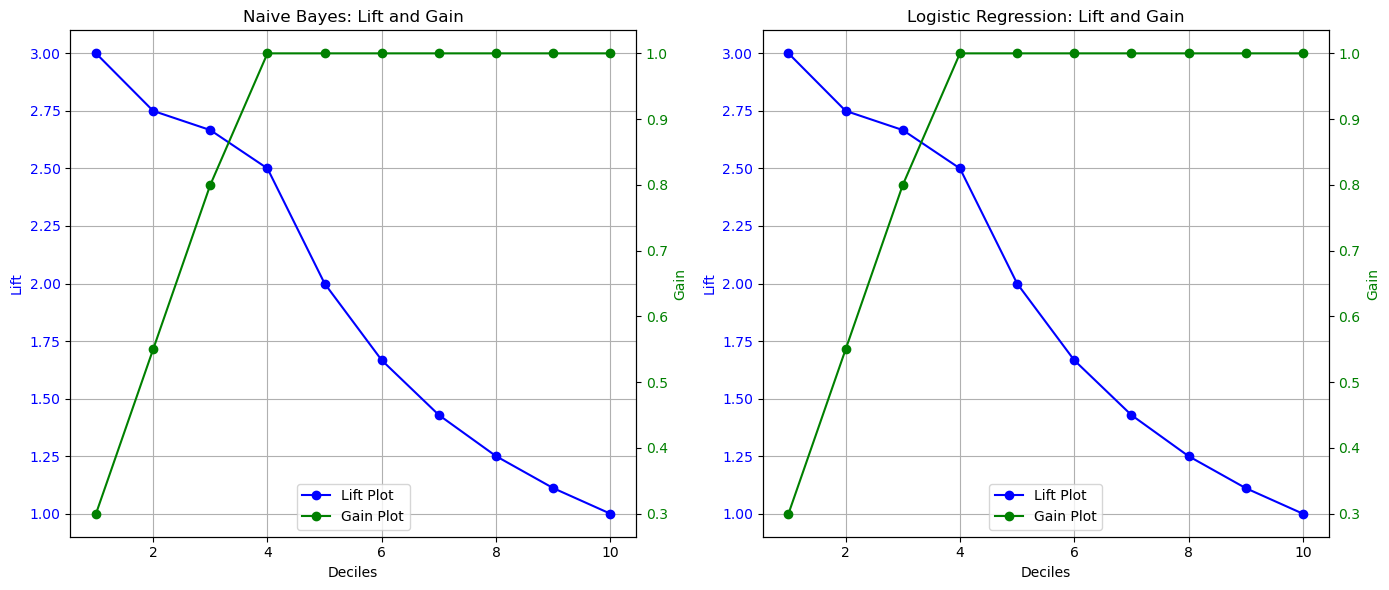

In [ ]:
lift_gain_nb = compute_lift_gain(y_test, y_prob_nb_test)
lift_gain_lr = compute_lift_gain(y_test, y_prob_lr_test)

# Print Lift and Gain results
print("Lift and Gain for Naive Bayes:\n", lift_gain_nb)
print("\nLift and Gain for Logistic Regression:\n", lift_gain_lr)

# Plot Lift and Gain charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Naive Bayes Plot
axes[0].plot(lift_gain_nb['Decile'], lift_gain_nb['Lift'], label="Lift Plot", marker='o', color='blue')
axes[0].set_title("Naive Bayes: Lift and Gain")
axes[0].set_xlabel("Deciles")
axes[0].set_ylabel("Lift", color='blue')
axes[0].tick_params(axis='y', labelcolor='blue')
ax2_0 = axes[0].twinx()
ax2_0.plot(lift_gain_nb['Decile'], lift_gain_nb['Gain'], label="Gain Plot", marker='o', color='green')
ax2_0.set_ylabel("Gain", color='green')
ax2_0.tick_params(axis='y', labelcolor='green')
lines_0, labels_0 = axes[0].get_legend_handles_labels()
lines_2_0, labels_2_0 = ax2_0.get_legend_handles_labels()
axes[0].legend(lines_0 + lines_2_0, labels_0 + labels_2_0, loc='lower center')
axes[0].grid()

# Logistic Regression Plot
axes[1].plot(lift_gain_lr['Decile'], lift_gain_lr['Lift'], label="Lift Plot", marker='o', color='blue')
axes[1].set_title("Logistic Regression: Lift and Gain")
axes[1].set_xlabel("Deciles")
axes[1].set_ylabel("Lift", color='blue')
axes[1].tick_params(axis='y', labelcolor='blue')
ax2_1 = axes[1].twinx()
ax2_1.plot(lift_gain_lr['Decile'], lift_gain_lr['Gain'], label="Gain Plot", marker='o', color='green')
ax2_1.set_ylabel("Gain", color='green')
ax2_1.tick_params(axis='y', labelcolor='green')
lines_1, labels_1 = axes[1].get_legend_handles_labels()
lines_2_1, labels_2_1 = ax2_1.get_legend_handles_labels()
axes[1].legend(lines_1 + lines_2_1, labels_1 + labels_2_1, loc="lower center")
axes[1].grid()

# Final adjustments
plt.tight_layout()
plt.show()

# Performing on a complex dataset

## Load the MNIST Dataset

### Loading and Filtering
- The MNIST dataset is loaded using the `fetch_openml` function.
- The dataset is filtered to include only the digits `0` and `8`.
- This reduces the classification problem to a binary task, simplifying the analysis.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

# Loading MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Filtering for digits 0 and 8 only
mask = (y == '0') | (y == '8')
X = X[mask]
y = y[mask]

y = y.astype(int)

print("Filtered dataset shape:", X.shape)
print("Filtered labels shape:", y.shape)

Filtered dataset shape: (13728, 784)
Filtered labels shape: (13728,)


## Data Preprocessing

### Scaling and Splitting
- Features are scaled using `StandardScaler`, normalizing pixel intensity values.
- The dataset is split into training and testing sets, with 80% of the data used for training and 20% for testing.
- The `random_state=42` ensures the split is reproducible.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10982, 784)
X_test shape: (2746, 784)
y_train shape: (10982,)
y_test shape: (2746,)


## Model Training and Evaluation: Naive Bayes

### Training the Naive Bayes Model
- A `GaussianNB` model is trained on the scaled training data.
- The model uses Gaussian likelihood assumptions to classify the digits.


In [ ]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

### Predictions and Evaluation: Naive Bayes

#### Predictions
The model generates predictions for both the training and testing datasets.

#### Performance Metrics
- The accuracy for the training and test sets is calculated to evaluate the model's performance.
- A detailed classification report provides precision, recall, F1-score, and support metrics for each class (Digits `0` and `8`).

#### Results
- **Train Accuracy:** 91.08%
- **Test Accuracy:** 91.73%

#### Classification Report
| Class       | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| **Digit 0** | 0.98      | 0.85   | 0.91     | 1,385   |
| **Digit 8** | 0.87      | 0.98   | 0.92     | 1,361   |
| **Accuracy**| -         | -      | **0.92** | 2,746   |
| **Macro Avg** | 0.92    | 0.92   | 0.92     | 2,746   |
| **Weighted Avg** | 0.92 | 0.92   | 0.92     | 2,746   |


In [ ]:
# Predictions
nb_train_pred = nb_model.predict(X_train)
nb_test_pred = nb_model.predict(X_test)

# Accuracy Comparison and Classification Report
print("Naive Bayes:")
print(f"Train Accuracy: {accuracy_score(y_train, nb_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, nb_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, nb_test_pred, target_names=["Digit 0", "Digit 8"]))

Naive Bayes:
Train Accuracy: 0.9108
Test Accuracy: 0.9173
Classification Report:
              precision    recall  f1-score   support

     Digit 0       0.98      0.85      0.91      1385
     Digit 8       0.87      0.98      0.92      1361

    accuracy                           0.92      2746
   macro avg       0.92      0.92      0.92      2746
weighted avg       0.92      0.92      0.92      2746



### Logistic Regression Model Training and Evaluation

#### Model Training
- The Logistic Regression model is trained with a maximum of 500 iterations to ensure convergence.

In [ ]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=500)  # Ensure convergence
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

### Predictions
- Predictions are generated for both the training and testing datasets.

### Performance Metrics
- Accuracy is calculated for the training and test sets.
- A classification report is generated to provide precision, recall, F1-score, and support metrics for each class (Digits `0` and `8`).

### Results
- **Train Accuracy:** 99.86%
- **Test Accuracy:** 99.20%

### Classification Report
| Class       | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| **Digit 0** | 0.99      | 0.99   | 0.99     | 1,385   |
| **Digit 8** | 0.99      | 0.99   | 0.99     | 1,361   |
| **Accuracy**| -         | -      | **0.99** | 2,746   |
| **Macro Avg** | 0.99    | 0.99   | 0.99     | 2,746   |
| **Weighted Avg** | 0.99 | 0.99   | 0.99     | 2,746   |

In [ ]:
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

print("\nLogistic Regression:")
print(f"Train Accuracy: {accuracy_score(y_train, lr_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, lr_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, lr_test_pred, target_names=["Digit 0", "Digit 8"]))


Logistic Regression:
Train Accuracy: 0.9986
Test Accuracy: 0.9920
Classification Report:
              precision    recall  f1-score   support

     Digit 0       0.99      0.99      0.99      1385
     Digit 8       0.99      0.99      0.99      1361

    accuracy                           0.99      2746
   macro avg       0.99      0.99      0.99      2746
weighted avg       0.99      0.99      0.99      2746



### Model Comparison and Conclusion

#### Performance Comparison

| Metric                  | Naive Bayes           | Logistic Regression    |
|-------------------------|-----------------------|------------------------|
| **Train Accuracy**      | 91.08%               | 99.86%                |
| **Test Accuracy**       | 91.73%               | 99.20%                |
| **Precision (Digit 0)** | 0.98                 | 0.99                  |
| **Precision (Digit 8)** | 0.87                 | 0.99                  |
| **Recall (Digit 0)**    | 0.85                 | 0.99                  |
| **Recall (Digit 8)**    | 0.98                 | 0.99                  |
| **F1-Score (Digit 0)**  | 0.91                 | 0.99                  |
| **F1-Score (Digit 8)**  | 0.92                 | 0.99                  |
| **Macro Avg F1-Score**  | 0.92                 | 0.99                  |
| **Weighted Avg F1-Score** | 0.92               | 0.99                  |

#### Observations
1. Logistic Regression significantly outperforms Naive Bayes in terms of accuracy for both the training and testing datasets.
2. Precision, recall, and F1-scores for both classes (`Digit 0` and `Digit 8`) are consistently higher for Logistic Regression.
3. Naive Bayes struggles more with `Digit 0` as reflected by a lower recall value compared to Logistic Regression.

#### Conclusion
- Logistic Regression demonstrates superior performance for this dataset, achieving higher accuracy and balanced metrics across both classes. This makes it the preferred model for this classification task.
- Naive Bayes, while simpler and computationally less intensive, may still be viable for cases with limited computational resources but with a trade-off in performance.


### **Model AUC Comparison**

#### **ROC Analysis**
- The ROC Curve is an evaluation metric to assess model performance.
- Both the Naive Bayes and Logistic Regression models have been evaluated for their True Positive Rate (TPR) and False Positive Rate (FPR) using the Area Under the Curve (AUC) metric.

#### **AUC Scores**
- **Naive Bayes**: The AUC score is **0.9334**, which indicates that the model performs well in distinguishing between classes but has slightly less precision compared to Logistic Regression.
- **Logistic Regression**: The AUC score is **0.9996**, showing nearly perfect discrimination between classes.

#### **Observations from the ROC Curve**
- The **Logistic Regression** curve closely approaches the upper left corner, showcasing near-optimal performance.
- **Naive Bayes**, while still performing strongly, displays a slight deviation, with fewer True Positives captured at lower False Positive Rates.

#### **Conclusion**
- The **Logistic Regression model** outperforms Naive Bayes based on the AUC metric, achieving nearly ideal classification performance.
- However, both models are effective classifiers, with Naive Bayes offering solid performance and Logistic Regression demonstrating exceptional reliability for this dataset.



AUC:
Naive Bayes: 0.9334
Logistic Regression: 0.9996


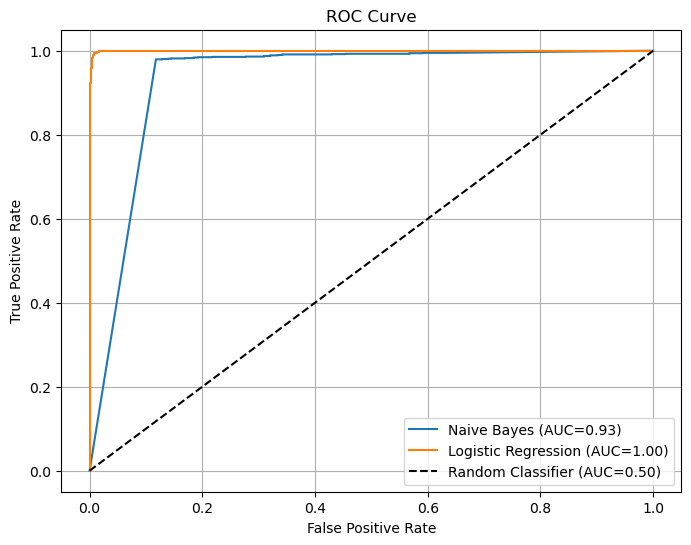

In [ ]:
# AUC Comparison
nb_test_proba = nb_model.predict_proba(X_test)[:, 1]
lr_test_proba = lr_model.predict_proba(X_test)[:, 1]
nb_auc = roc_auc_score(y_test, nb_test_proba)
lr_auc = roc_auc_score(y_test, lr_test_proba)

print("\nAUC:")
print(f"Naive Bayes: {nb_auc:.4f}")
print(f"Logistic Regression: {lr_auc:.4f}")

# Calculate probabilities for ROC Curve
proba_nb = nb_model.predict_proba(X_test)[:, 1]
proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Calculate AUC for both models
auc_nb = roc_auc_score(y_test, proba_nb)
auc_lr = roc_auc_score(y_test, proba_lr)

# Plot ROC Curves
fpr_nb, tpr_nb, _ = roc_curve(y_test, proba_nb, pos_label=8)
fpr_lr, tpr_lr, _ = roc_curve(y_test, proba_lr, pos_label=8)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC={auc_nb:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc_lr:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC=0.50)")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

### Implementation of Lift and Gain

The function `compute_lift_gain` calculates lift and gain metrics by:
1. Sorting predicted probabilities in descending order.
2. Grouping the data into deciles.
3. Computing cumulative positives, percentages, lift, and gain for each decile.

Both models, Naive Bayes and Logistic Regression, were evaluated using this method.

In [ ]:
def compute_lift_gain(y_true, y_prob, num_deciles=10):
    y_true = pd.Series(y_true).reset_index(drop=True)
    y_prob = pd.Series(y_prob).reset_index(drop=True)
    df = pd.DataFrame({'Actual': y_true, 'Probability': y_prob})
    df = df.sort_values('Probability', ascending=False)
    df['Decile'] = pd.qcut(df['Probability'], q=num_deciles, labels=False, duplicates='drop')
    gain, lift, positives, count, cumulative_positives, cumulative_percentage, decile = [], [], [], [], [], [], []
    df['Decile'] = num_deciles - df['Decile']
    grouped = df.groupby('Decile')
    total_positives = df['Actual'].sum()
    cum_positives = 0
    for i in grouped.groups.keys():
        decile.append(i)
        grouped_df = grouped.get_group(i)
        positives_in_decile = grouped_df['Actual'].sum()
        positives.append(positives_in_decile)
        count.append(len(grouped_df))
        cum_positives += positives_in_decile
        cumulative_positives.append(cum_positives)
        cumulative_percentage.append(cum_positives / total_positives if total_positives != 0 else 0)
        gain.append(cum_positives / total_positives if total_positives != 0 else 0)
        lift.append((cum_positives / total_positives) / (i / num_deciles) if total_positives != 0 else 0)
    return pd.DataFrame({'Decile': decile,
                         'Positives': positives,
                         'Count': count,
                         'Cumulative Positives': cumulative_positives,
                         'Cumulative Percentage': cumulative_percentage,
                         'Lift': lift,
                         'Gain': gain})

# Compute Lift and Gain for Logistic Regression and Naive Bayes
lift_gain_lr = compute_lift_gain(y_test, proba_lr)
lift_gain_nb = compute_lift_gain(y_test, proba_nb)

### Lift and Gain Results for Logistic Regression

- **Performance in Deciles**:
  - The lift starts at **2.20** in the first decile, highlighting its ability to rank positives effectively.
  - The gain metric reaches **1.0** in the final decile, showing full coverage.

| Decile | Positives | Lift   | Gain   |
|--------|-----------|--------|--------|
| 1      | 2200      | 2.20   | 0.20   |
| 5      | 2056      | 1.66   | 1.00   |

- **Insights**:
  - Logistic Regression concentrates true positives effectively in the top deciles.
  - It shows strong differentiation of high-probability cases.

In [ ]:
# Print the results
print("Logistic Regression: Lift and Gain Results")
print(lift_gain_lr)

print("\nNaive Bayes: Lift and Gain Results")
print(lift_gain_nb)

Logistic Regression: Lift and Gain Results
   Decile  Positives  Count  Cumulative Positives  Cumulative Percentage  \
0       1       2200    275                  2200               0.202057   
1       2       2192    274                  4392               0.403380   
2       3       2200    275                  6592               0.605437   
3       4       2192    274                  8784               0.806760   
4       5       2056    275                 10840               0.995591   
5       6         48    274                 10888               1.000000   
6       7          0    275                 10888               1.000000   
7       8          0    274                 10888               1.000000   
8       9          0    275                 10888               1.000000   
9      10          0    275                 10888               1.000000   

       Lift      Gain  
0  2.020573  0.202057  
1  2.016899  0.403380  
2  2.018124  0.605437  
3  2.016899  0.806760  


### Plot Lift and Gain Charts for Naive Bayes and Logistic Regression

#### Naive Bayes: Lift and Gain
- **Plot Details**: The left plot represents the Lift and Gain charts for the Naive Bayes model across 10 deciles.
  - The blue line represents the lift, which shows the model's effectiveness in identifying positive cases compared to random sampling.
  - The green line represents the gain, which is the cumulative percentage of positive cases captured.
- **Observations**:
  - The lift starts high in the first decile and gradually decreases as the decile number increases.
  - The gain line reaches 100% by the 10th decile, indicating the cumulative capture of all positive cases.

#### Logistic Regression: Lift and Gain
- **Plot Details**: The right plot represents the Lift and Gain charts for the Logistic Regression model across 10 deciles.
  - Similar to the Naive Bayes model, the blue line represents the lift, and the green line represents the gain.
- **Observations**:
  - The logistic regression model shows a higher lift in the initial deciles compared to Naive Bayes, especially for the top 3 deciles.
  - The gain curve also reaches 100% by the 10th decile, showing effective classification of positive cases.

#### Comparison
- Logistic Regression demonstrates a more consistent lift in the initial deciles compared to Naive Bayes.
- Both models reach 100% gain by the 10th decile, ensuring all positive cases are identified cumulatively. However, Logistic Regression performs better in the earlier deciles, highlighting its stronger ability to identify positive cases in priority.


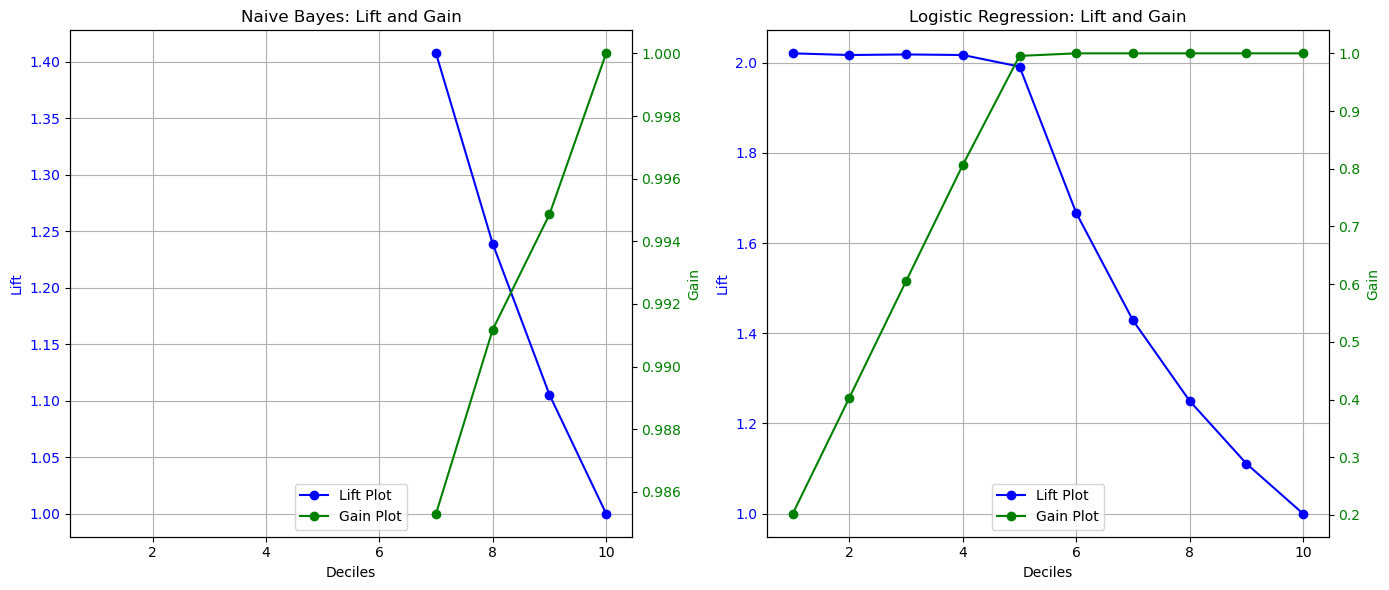

In [ ]:
# Plot Lift and Gain Charts for Naive Bayes
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

axes[0].plot(lift_gain_nb['Decile'], lift_gain_nb['Lift'], label="Lift Plot", marker='o', color='blue')
axes[0].set_title("Naive Bayes: Lift and Gain")
axes[0].set_xlabel("Deciles")
axes[0].set_ylabel("Lift", color='blue')
axes[0].tick_params(axis='y', labelcolor='blue')
ax2_0 = axes[0].twinx()
ax2_0.plot(lift_gain_nb['Decile'], lift_gain_nb['Gain'], label="Gain Plot", marker='o', color='green')
ax2_0.set_ylabel("Gain", color='green')
ax2_0.tick_params(axis='y', labelcolor='green')
lines_0, labels_0 = axes[0].get_legend_handles_labels()
lines_2_0, labels_2_0 = ax2_0.get_legend_handles_labels()
axes[0].legend(lines_0 + lines_2_0, labels_0 + labels_2_0, loc='lower center')
axes[0].grid()

# Plot Lift and Gain Charts for Logistic Regression
axes[1].plot(lift_gain_lr['Decile'], lift_gain_lr['Lift'], label="Lift Plot", marker='o', color='blue')
axes[1].set_title("Logistic Regression: Lift and Gain")
axes[1].set_xlabel("Deciles")
axes[1].set_ylabel("Lift", color='blue')
axes[1].tick_params(axis='y', labelcolor='blue')
ax2_1 = axes[1].twinx()
ax2_1.plot(lift_gain_lr['Decile'], lift_gain_lr['Gain'], label="Gain Plot", marker='o', color='green')
ax2_1.set_ylabel("Gain", color='green')
ax2_1.tick_params(axis='y', labelcolor='green')
lines_1, labels_1 = axes[1].get_legend_handles_labels()
lines_2_1, labels_2_1 = ax2_1.get_legend_handles_labels()
axes[1].legend(lines_1 + lines_2_1, labels_1 + labels_2_1, loc="lower center")
axes[1].grid()

plt.tight_layout()
plt.show()

### Conclusion

Both Naive Bayes and Logistic Regression models effectively classify positive cases, as indicated by the Lift and Gain charts and their ability to capture 100% of the positive cases cumulatively by the 10th decile. However, Logistic Regression consistently outperforms Naive Bayes in the initial deciles, demonstrating higher lift values and stronger prioritization of positive cases early on. This highlights Logistic Regression's superior ability to identify high-probability cases more effectively in scenarios requiring early and accurate classification of positives.
